<a href="https://colab.research.google.com/github/TAMIDSpiyalong/ECEN-689/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification of an American Sign Language Dataset

In this section, we will perform the data preparation, model creation, and model training steps we observed in the last section using a different dataset: images of hands making letters in [American Sign Language](http://www.asl.gs/).

## Objectives

* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

## American Sign Language Dataset

The [American Sign Language alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset.  

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?export=download&id=1vYSdI8ESMxoZfReDWA7UyGu8G6MVDgHW')

gdown.download('https://drive.google.com/uc?export=download&id=1eVjd8tCCpQHouOHaeAAk-YOtflDSQ3vD')

<img src="./images/asl.png" style="width: 600px;">

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

## Loading the Data

This dataset is not available via Keras in the same way that MNIST is, so let's learn how to load custom data. By the end of this section we will have `x_train`, `y_train`, `x_valid`, and `y_valid` variables as before.

### Reading in the Data

The sign language dataset is in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values) format, the same data structure behind Microsoft Excel and Google Sheets. It is a grid of rows and columns with labels at the top, as seen in the [train](data/asl_data/sign_mnist_train.csv) and [valid](data/asl_data/sign_mnist_valid.csv) datasets (they may take a moment to load).

To load and work with the data, we'll be using a library called [Pandas](https://pandas.pydata.org/), which is a highly performant tool for loading and manipulating data. We'll read the CSV files into a format called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd

Pandas has a [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method that expects a csv file, and returns a DataFrame:

In [5]:
train_df = pd.read_csv("https://drive.google.com/uc?export=download&id=16f7zn2Y0uvE1H_GhhlFvVQgP5-uoTvss")
valid_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1F0irmC7s9ZR-3C6c48OZlbUa1szOchnK")

In [ ]:
https://drive.google.com/file/d/1F0irmC7s9ZR-3C6c48OZlbUa1szOchnK/view?usp=drive_link

In [ ]:
https://drive.google.com/file/d/16f7zn2Y0uvE1H_GhhlFvVQgP5-uoTvss/view?usp=drive_link

### Exploring the Data

Let's take a look at our data. We can use the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method to print the first few rows of the DataFrame. Each row is an image which has a `label` column, and also, 784 values representing each pixel value in the image, just like with the MNIST dataset. Note that the labels currently are numerical values, not letters of the alphabet:

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Extracting the Labels

As with MNIST, we would like to store our training and validation labels in `y_train` and `y_valid` variables. Here we create those variables and then delete the labels from our original dataframes, where they are no longer needed:

In [8]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

KeyError: ignored

### Extracting the Images

As with MNIST, we would like to store our training and validation images in `x_train` and `x_valid` variables. Here we create those variables:

In [9]:
x_train = train_df.values
x_valid = valid_df.values

### Summarizing the Training and Validation Data

We now have 27,455 images with 784 pixels each for training...

In [10]:
x_train.shape

(27455, 784)

...as well as their corresponding labels:

In [11]:
y_train.shape

(27455,)

For validation, we have 7,172 images...

In [12]:
x_valid.shape

(7172, 784)

...and their corresponding labels:

In [13]:
y_valid.shape

(7172,)

## Visualizing the Data

To visualize the images, we will again use the matplotlib library. We don't need to worry about the details of this visualization, but if interested, you can learn more about [matplotlib](https://matplotlib.org/) at a later time.

Note that we'll have to reshape the data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

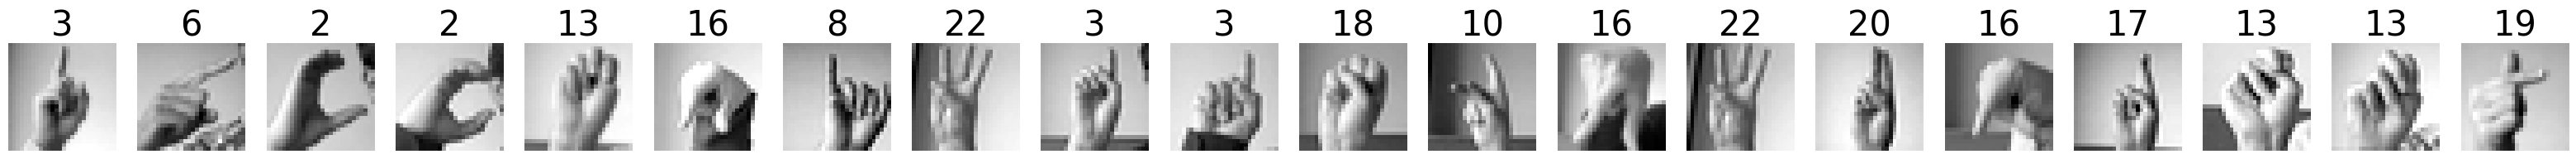

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Exercise: Normalize the Image Data

As we did with the MNIST dataset, we are going to normalize the image data, meaning that their pixel values, instead of being between 0 and 255 as they are currently:

In [35]:
x_train.min()

0.0

In [36]:
x_train.max()

1.0

...should be floating point values between 0 and 1. Use the following cell to work. If you get stuck, look at the solution below.

In [37]:
# TODO: Normalize x_train and x_valid.

### Solution

Click on the '...' below to show the solution.

In [38]:
# SOLUTION
# x_train = x_train / 255 is also correct)
x_train = train_df.values / 255
x_valid = valid_df.values / 255

## Exercise: Categorize the Labels

As we did with the MNIST dataset, we are going to categorically encode the labels. Recall that we can use the [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method to accomplish this by passing it the values to encode, and, the number of categories to encode it into. Do your work in the cell below. We have imported `keras` and set the number of categories (24) for you.

In [39]:
import tensorflow.keras as keras
num_classes = 24

In [40]:
# TODO: Categorically encode y_train and y_valid.

### Solution

Click on the '...' below to show the solution.

In [41]:
# SOLUTION
if not y_train.shape[-1] == 24:  # Avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

IndexError: ignored

## Exercise: Build the Model

The data is all prepared, we have normalized images for training and validation, as well as categorically encoded labels for training and validation.

For this exercise we are going to build a sequential model. Just like last time, build a model that:
* Has a dense input layer. This layer should contain 512 neurons, use the `relu` activation function, and expect input images with a shape of `(784,)`
* Has a second dense layer with 512 neurons which uses the `relu` activation function
* Has a dense output layer with neurons equal to the number of classes, using the `softmax` activation function

Do your work in the cell below, creating a `model` variable to store the model. We've imported the Keras [Sequental](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class and [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class to get you started. Reveal the solution below for a hint:

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# TODO: build a model following the guidelines above.

### Solution

Click on the '...' below to show the solution.

In [29]:
# SOLUTION
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

## Summarizing the Model

Run the cell below to summarize the model you just created:

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

We'll [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) our model with the same options as before, using [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model:

In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Exercise: Train the Model

Use the model's `fit` method to train it for 20 epochs using the training and validation images and labels created above:

In [32]:
# TODO: Train the model for 20 epochs.

### Solution

Click on the '...' below to show the solution.

In [33]:
# SOLUTION
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20


ValueError: ignored

## Discussion: What happened?

We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What happened here?

Think about it for a bit before clicking on the '...' below to reveal the answer.

`# SOLUTION`
This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called *overfitting*. We will discuss overfitting in the next two lectures, as well as some ways to address it.

## Summary

In this section you built your own neural network to perform image classification that is quite accurate. Congrats!

At this point we should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with prepared data.

### Clear the Memory
Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

Now that you have built some very basic, somewhat effective models, we will begin to learn about more sophisticated models, including *Convolutional Neural Networks*.

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>

# Convolutional Neural Networks

In the previous section, we built and trained a simple model to classify ASL images. The model was able to learn how to correctly classify the training dataset with very high accuracy, but, it did not perform nearly as well on validation dataset. This behavior of not generalizing well to non-training data is called [overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html), and in this section, we will introduce a popular kind of model called a [convolutional neural network](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) that is especially good for reading images and classifying them.

## Objectives

* Prep data specifically for a CNN
* Create a more sophisticated CNN model, understanding a greater variety of model layers
* Train a CNN model and observe its performance

## Loading and Preparing the Data

The below cell contains the data preprocessing techniques we learned in the previous labs. Review it and execute it before moving on:

In [ ]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

## Reshaping Images for a CNN

In the last exercise, the individual pictures in our dataset are in the format of long lists of 784 pixels:

In [ ]:
x_train.shape, x_valid.shape

In this format, we don't have all the information about which pixels are near each other. Because of this, we can't apply convolutions that will detect features. Let's reshape our dataset so that they are in a 28x28 pixel format. This will allow our convolutions to associate groups of pixels and detect important features.

Note that for the first convolutional layer of our model, we need to have not only the height and width of the image, but also the number of [color channels](https://www.photoshopessentials.com/essentials/rgb/). Our images are grayscale, so we'll just have 1 channel.

That means that we need to convert the current shape `(27455, 784)` to `(27455, 28, 28, 1)`. As a convenience, we can pass the [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape) method a `-1` for any dimension we wish to remain the same, therefore:

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [ ]:
x_train.shape

In [ ]:
x_valid.shape

In [ ]:
x_train.shape, x_valid.shape

## Creating a Convolutional Model

These days, many data scientists start their projects by borrowing model properties from a similar project. Assuming the problem is not totally unique, there's a great chance that people have created models that will perform well which are posted in online repositories like [TensorFlow Hub](https://www.tensorflow.org/hub) and the [NGC Catalog](https://ngc.nvidia.com/catalog/models). Today, we'll provide a model that will work well for this problem.

<img src="images/cnn.png" width=180 />

We covered many of the different kinds of layers in the lecture, and we will go over them all here with links to their documentation. When in doubt, read the official documentation (or ask [stackoverflow](https://stackoverflow.com/)).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

### [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

<img src="images/conv2d.png" width=300 />

These are our 2D convolutional layers. Small kernels will go over the input image and detect features that are important for classification. Earlier convolutions in the model will detect simple features such as lines. Later convolutions will detect more complex features. Let's look at our first Conv2D layer:
```Python
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same'...)
```
75 refers to the number of filters that will be learned. (3,3) refers to the size of those filters. Strides refer to the step size that the filter will take as it passes over the image. Padding refers to whether the output image that's created from the filter will match the size of the input image.

### [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

Like normalizing our inputs, batch normalization scales the values in the hidden layers to improve training. [Read more about it in detail here](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/).

### [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

<img src="images/maxpool2d.png" width=300 />
Max pooling takes an image and essentially shrinks it to a lower resolution. It does this to help the model be robust to translation (objects moving side to side), and also makes our model faster.

### [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

<img src="images/dropout.png" width=360 />
Dropout is a technique for preventing overfitting. Dropout randomly selects a subset of neurons and turns them off, so that they do not participate in forward or backward propagation in that particular pass. This helps to make sure that the network is robust and redundant, and does not rely on any one area to come up with answers.    

### [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

Flatten takes the output of one layer which is multidimensional, and flattens it into a one-dimensional array. The output is called a feature vector and will be connected to the final classification layer.

### [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

We have seen dense layers before in our earlier models. Our first dense layer (512 units) takes the feature vector as input and learns which features will contribute to a particular classification. The second dense layer (24 units) is the final classification layer that outputs our prediction.

## Summarizing the Model

This may feel like a lot of information, but don't worry. It's not critical that to understand everything right now in order to effectively train convolutional models. Most importantly we know that they can help with extracting useful information from images, and can be used in classification tasks.

Here, we summarize the model we just created. Notice how it has fewer trainable parameters than the model in the previous notebook:

In [ ]:
model.summary()

## Compiling the Model

We'll compile the model just like before:

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

## Training the Model

Despite the very different model architecture, the training looks exactly the same. Run the cell below to train for 20 epochs and let's see if the accuracy improves:

In [ ]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

## Discussion of Results

It looks like this model is significantly improved! The training accuracy is very high, and the validation accuracy has improved as well. This is a great result, as all we had to do was swap in a new model.

You may have noticed the validation accuracy jumping around. This is an indication that our model is still not generalizing perfectly. Fortunately, there's more that we can do. Let's talk about it in the next lecture.

## Summary

In this section, we utilized several new kinds of layers to implement a CNN, which performed better than the more simple model used in the last section. Hopefully the overall process of creating and training a model with prepared data is starting to become even more familiar.

## Clear the Memory
Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

In the last several sections you have focused on the creation and training of models. In order to further improve performance, you will now turn your attention to *data augmentation*, a collection of techniques that will allow your models to train on more and better data than what you might have originally at your disposal.

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>